In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv("/lending_club_loan_data_analysis.csv")

In [ ]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# shape of the dataset
dataset.shape

(9578, 14)

In [ ]:
# check for the null values
dataset.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
# converting categorical values in numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['purpose'] = le.fit_transform(dataset['purpose'])
dataset['purpose']

0       2
1       1
2       2
3       2
4       1
       ..
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: int64

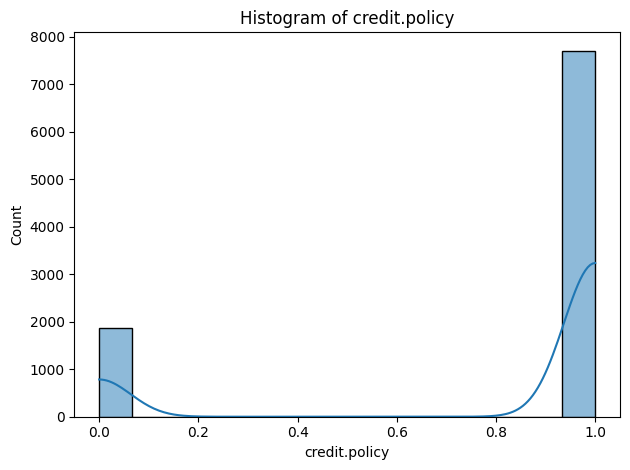

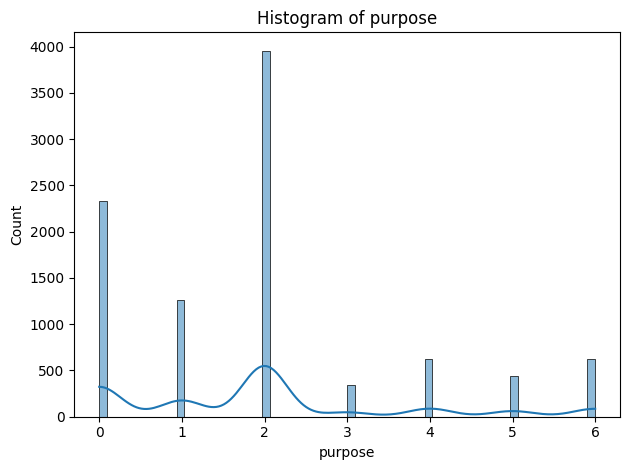

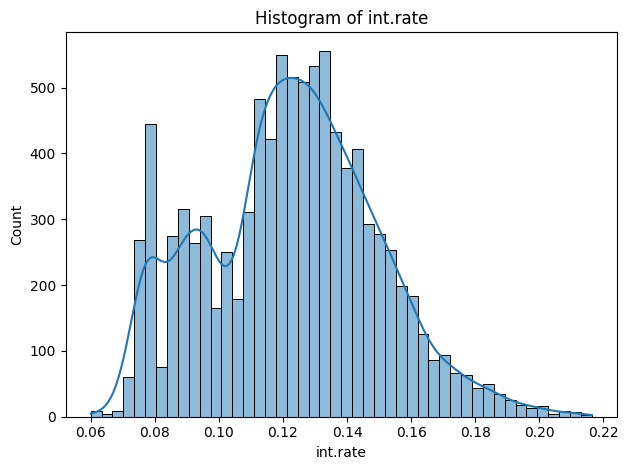

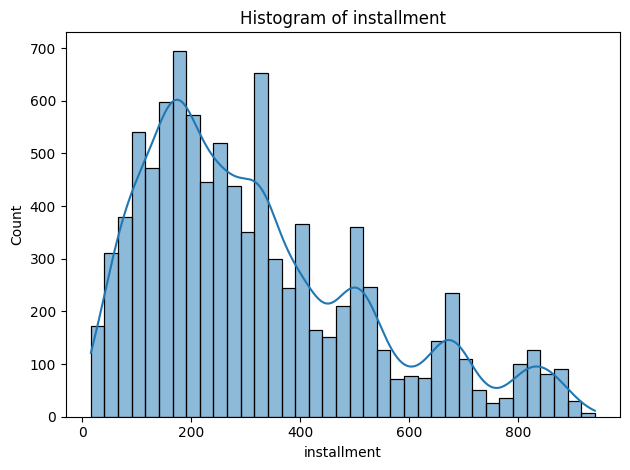

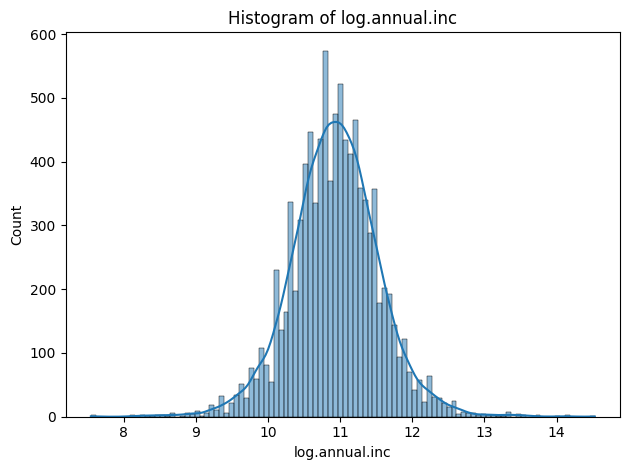

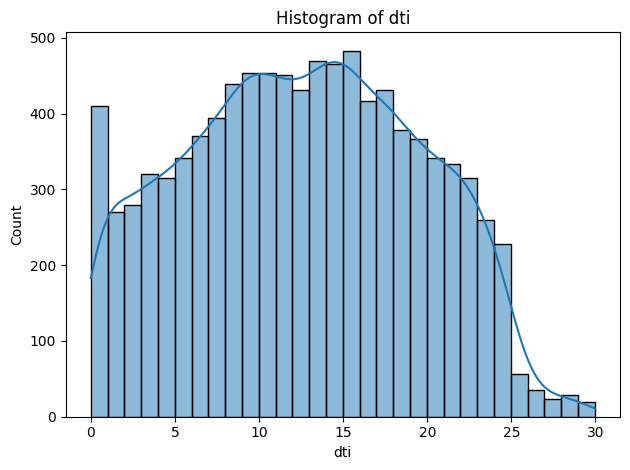

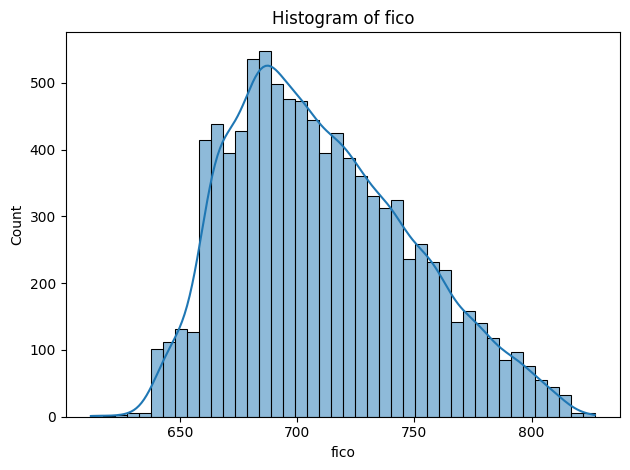

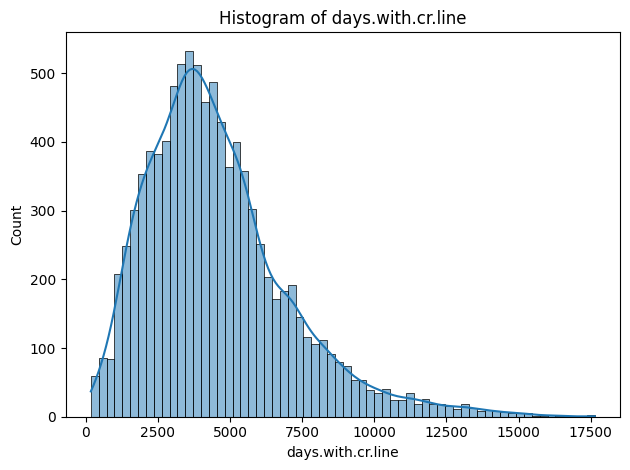

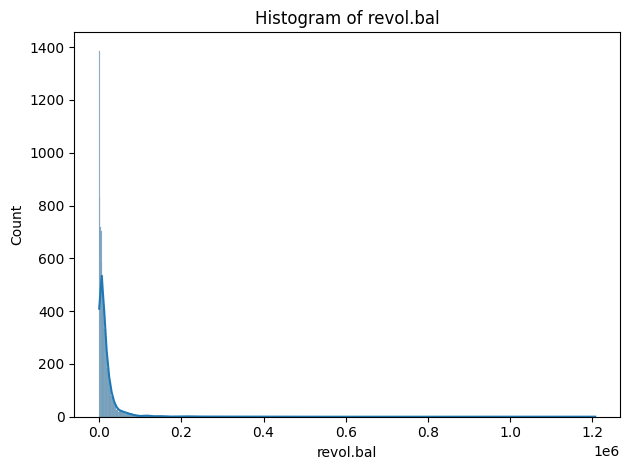

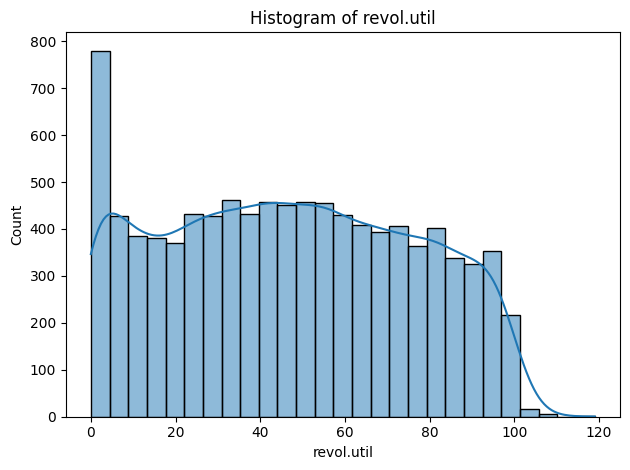

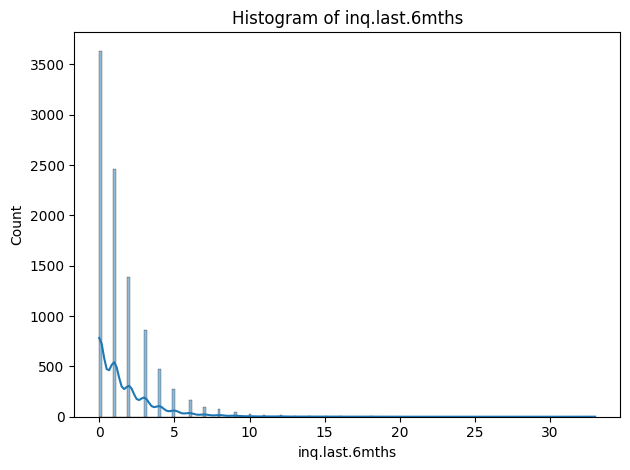

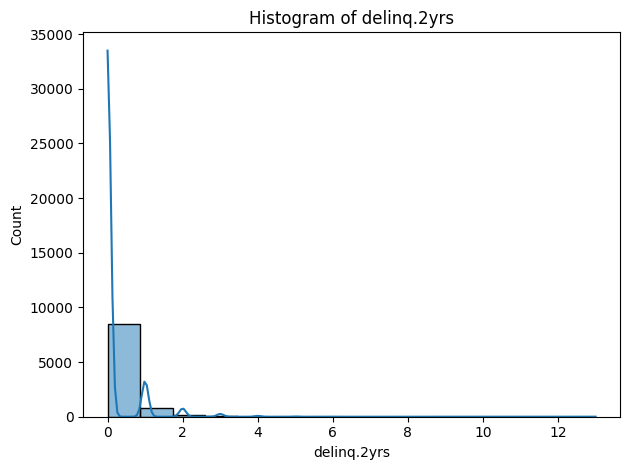

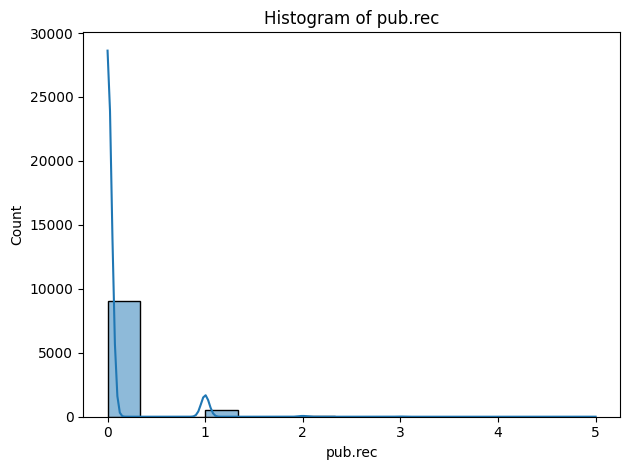

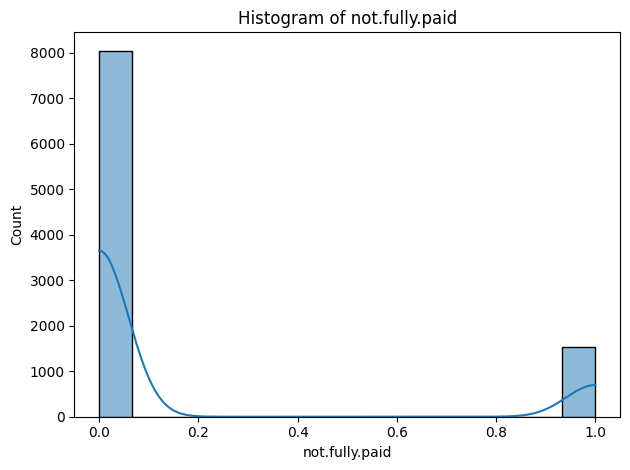

In [ ]:
# Exploratory Data Analysis
columns = dataset.columns

for cols in columns:
  sns.histplot(data = dataset[cols], kde = True)
  plt.title(f"Histogram of {cols}")
  plt.tight_layout()
  plt.show()


In [ ]:
# Removing the categorical columns
categorical_cols = ['credit.policy', 'purpose', 'not.fully.paid']

# we can drop the columns that has maximum value as zero
max_zero_val_cols = ['revol.bal', 'pub.rec', 'delinq.2yrs']

columns = [col for col in columns if col not in categorical_cols]
columns = [col for col in columns if col not in max_zero_val_cols]
columns

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.util',
 'inq.last.6mths']

In [ ]:
# standardising the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset[columns] = sc.fit_transform(dataset[columns])

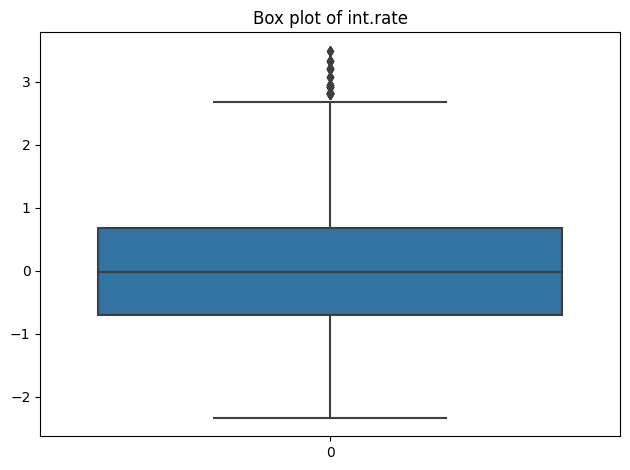

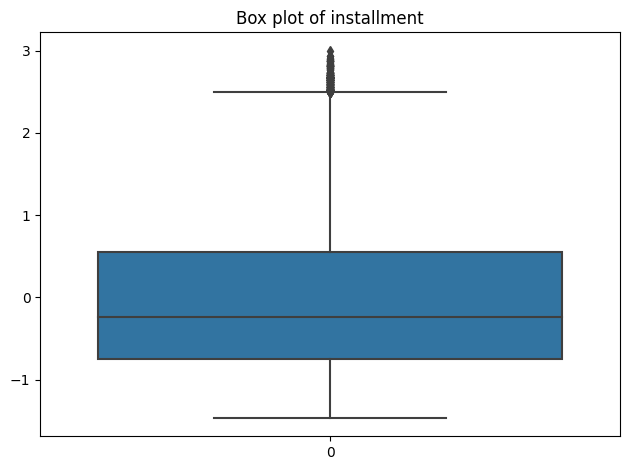

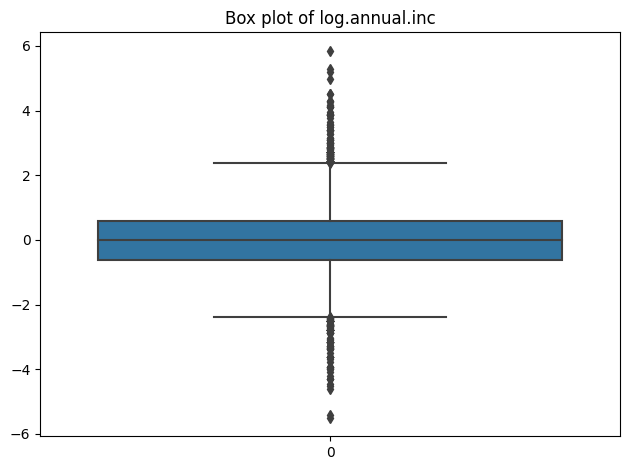

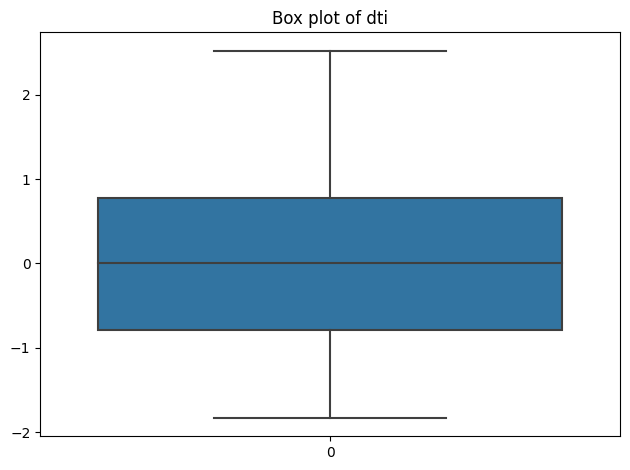

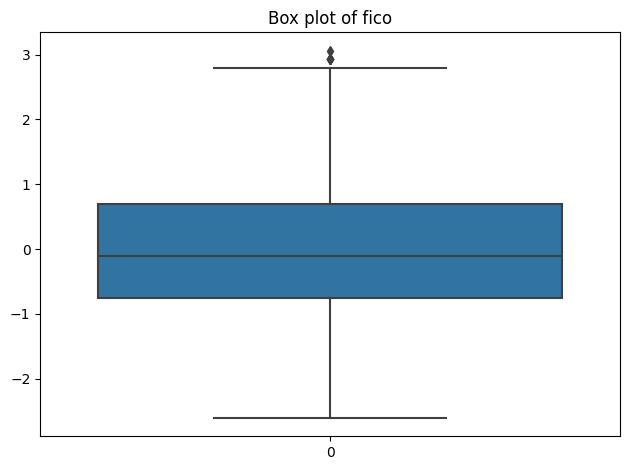

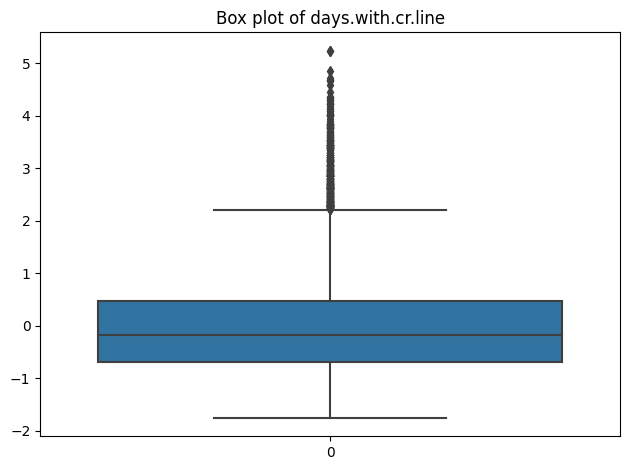

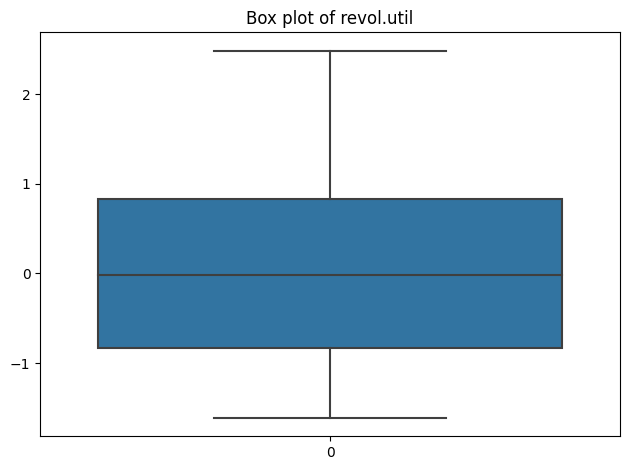

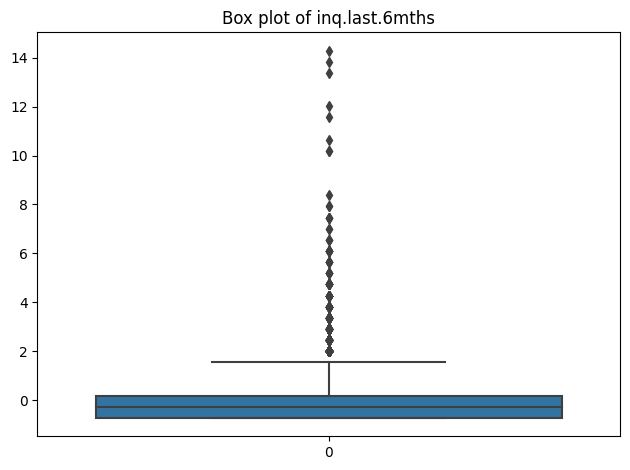

In [ ]:
# Visualizing the normalise data for outliners
for cols in columns:
  sns.boxplot(data = dataset[cols])
  plt.title(f"Box plot of {cols}")
  plt.tight_layout()
  plt.show()

In [ ]:
for col in columns:
  dataset = dataset[(dataset[col] < 2) & (dataset[col] > -2)]
dataset = dataset.reset_index(drop=True)
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,33623,1.030602,-0.716989,0,0,0
1,1,2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,3511,-0.730683,-0.262470,0,0,0
2,1,2,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,33667,0.909966,-0.262470,0,0,0
3,1,1,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,4740,-0.251586,-0.716989,1,0,0
4,1,1,-1.633045,-0.936728,1.582435,0.635324,0.425449,0.624509,50807,0.144790,-0.716989,0,0,0


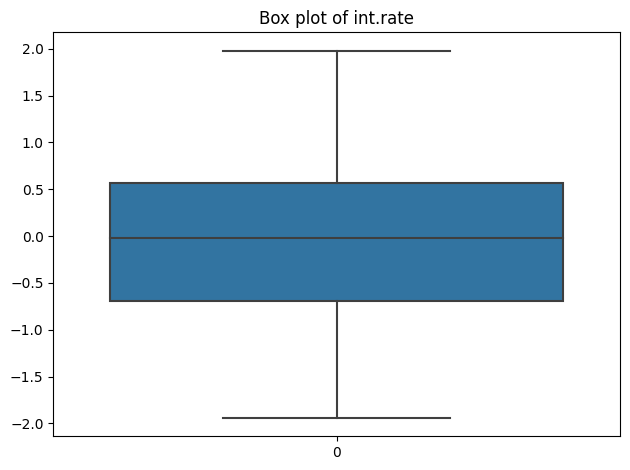

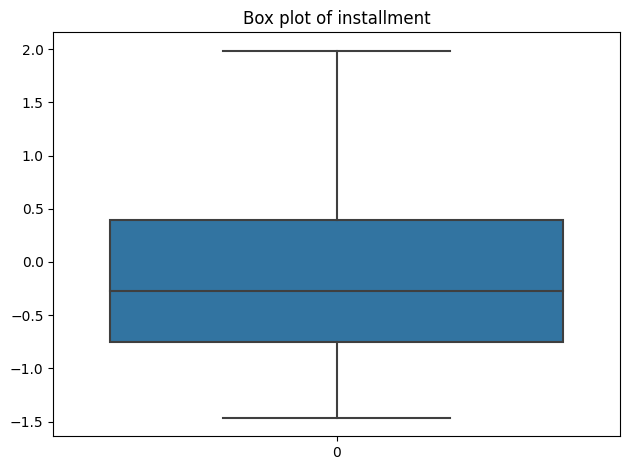

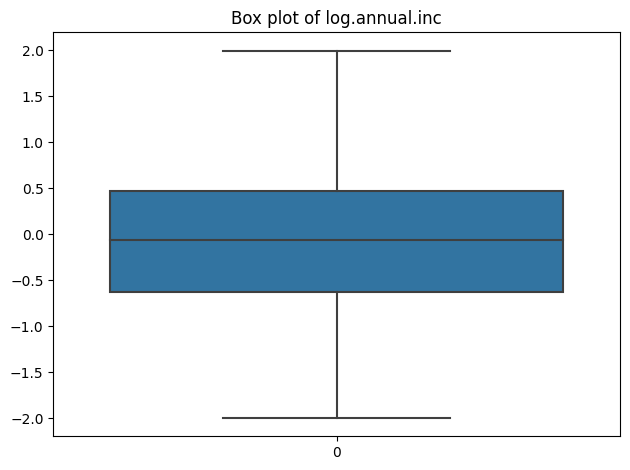

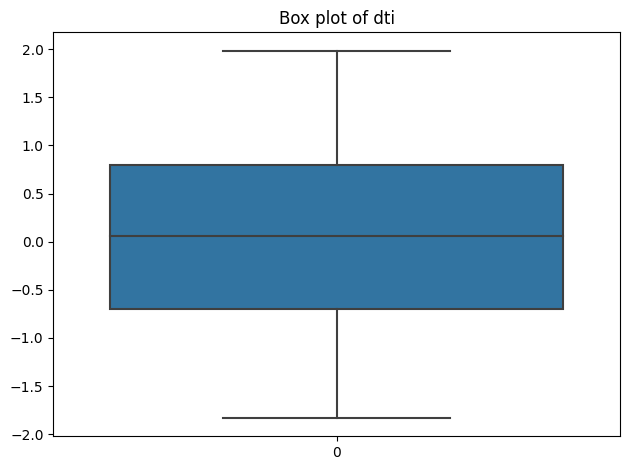

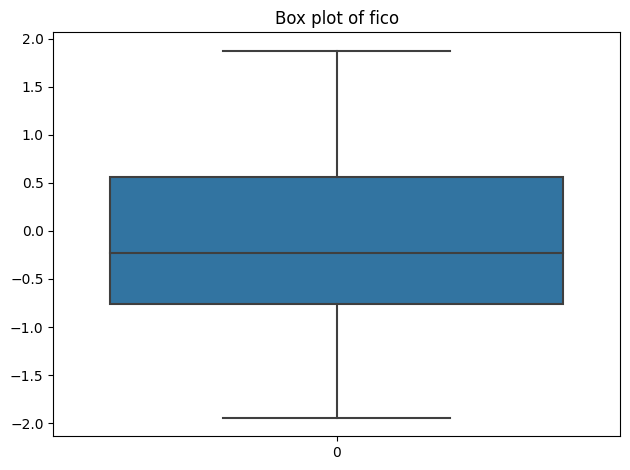

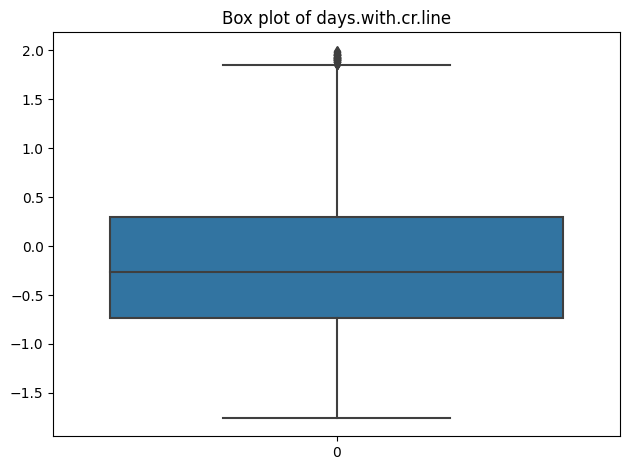

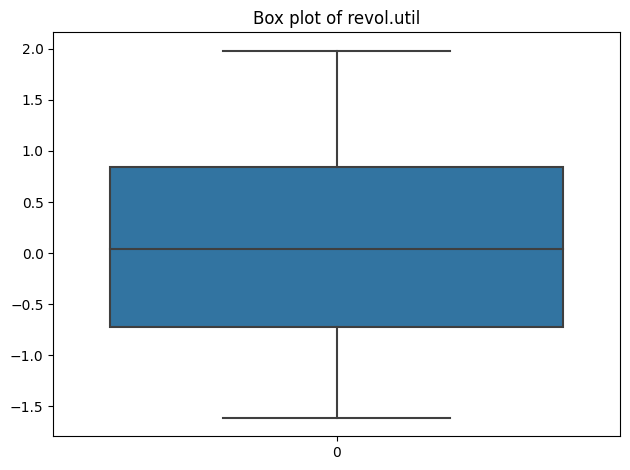

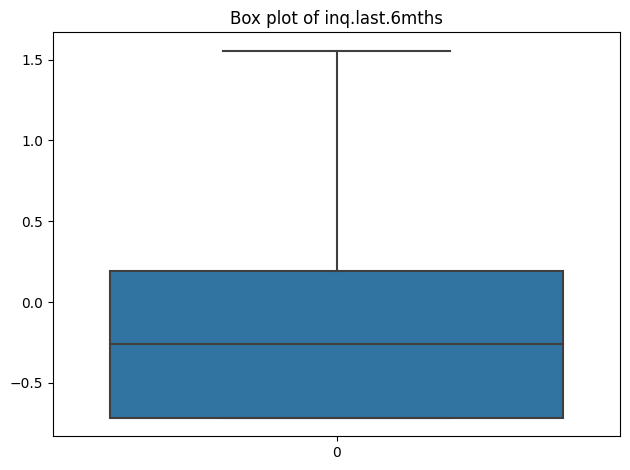

In [ ]:
for cols in columns:
  sns.boxplot(data = dataset[cols])
  plt.title(f"Box plot of {cols}")
  plt.tight_layout()
  plt.show()

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]
X.shape, y.shape

((7365, 13), (7365,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(526, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 526)               67854     
                                                                 
 dense_9 (Dense)             (None, 128)               67456     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
185/185 [==============================] - 3s 7ms/step - loss: 22.8458 - accuracy: 0.7312
Epoch 2/100
185/185 [==============================] - 1s 6ms/step - loss: 3.1553 - accuracy: 0.7612
Epoch 3/100
185/185 [==============================] - 1s 5ms/step - loss: 1.0953 - accuracy: 0.7996
Epoch 4/100
185/185 [==============================] - 1s 6ms/step - loss: 1.9328 - accuracy: 0.7799
Epoch 5/100
185/185 [==============================] - 1s 5ms/step - loss: 0.7337 - accuracy: 0.8282
Epoch 6/100
185/185 [==============================] - 1s 5ms/step - loss: 0.4930 - accuracy: 0.8506
Epoch 7/100
185/185 [==============================] - 1s 5ms/step - loss: 0.4718 - accuracy: 0.8523
Epoch 8/100
185/185 [==============================] - 1s 5ms/step - loss: 0.4910 - accuracy: 0.8503
Epoch 9/100
185/185 [==============================] - 1s 5ms/step - loss: 0.4483 - accuracy: 0.8551
Epoch 10/100
185/185 [==============================] - 1s 5ms/step - loss: 1.6221 - accur

In [ ]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]

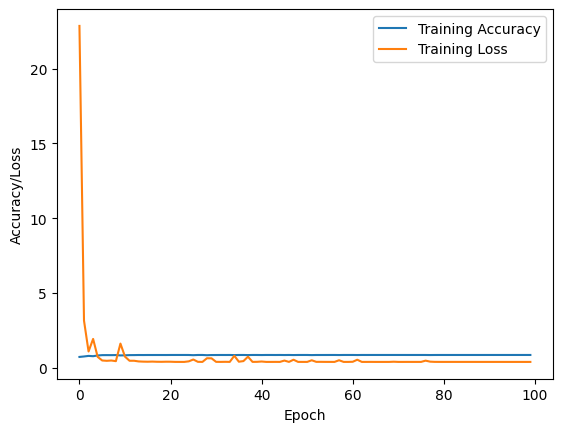

In [ ]:
plt.plot(accuracy, label='Training Accuracy')
plt.plot(loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
y_pred = model.predict(x_test)
y_pred = y_pred.flatten().astype(int)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Area under curve:', roc_auc_score(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
Accuracy: 0.8560760353021045
Confusion Matrix:
 [[1261    0]
 [ 212    0]]
Area under curve: 0.5
